Goal of this task is to fit a polynomial through data points $(x_1, y_1), \ldots , (x_n, y_n) \in \mathbb{R} \times \mathbb{R}$. Assume that the outcome $y = (y_1,\ldots , y_n)^T$ follows a normal distibution $\mathcal{N} (y \vert Xw, \sigma^2I)$, where

$$
 X = \begin{bmatrix}
\vert & \vert & \vert & \vert & \vert \\
1 & x & x^2 & \ldots & x^d \\
\vert & \vert & \vert & \vert & \vert
\end{bmatrix}
$$ 


### a)
Write a function that generates the matrix $X$ for $x = (x_1,\ldots, x_n)^T$ .


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load  data 
train = pd.read_csv('data/TrainingSet1D.csv', names = ['x','y'])
test = pd.read_csv('data/TestSet1D.csv', names = ['x','y'])

x_train = np.array(train.x).T
x_test = np.array(test.x).T

y_train = np.array(train.y).T
y_test = np.array(test.y).T

In [3]:
def generate_X(x, d):
    n = len(x)
    X = np.ones((n,d))
    for j in range(n):
        for i in range(d):
            X[j,i] = x[j]**i
    return(X)

b)
Implement the estimator $w_{MLE}$.

In [4]:
def w_mle(X,y):
    XtX = np.dot(X.T, X)
    XtX_inverse = np.linalg.inv(XtX)
    XtXX = np.dot(XtX_inverse,X.T)
    w = np.dot(XtXX, y)
    return(w)

### c)
Implement a function that calculates the error $\operatorname{MSE}(w) = \frac{1}{N}(Xw − y)^T (Xw − y)$.

In [5]:
def mse(w, X, y):
    n = len(y)
    diff = np.dot(X,w)-y
    mse = 1/n * np.dot(diff.T,diff)
    return(mse)

### d)
Try to find a good polynomial degree $d$ that leads to a small test error. Plot your best solution together with the training data.

In [6]:
# find d with small test error
X_train = []
X_test = []

w = []
mse_train = []
mse_test = []

for d in range(25):
    X_train.append(generate_X(x_train, d+1))
    X_test.append(generate_X(x_test, d+1))
    
    w.append(w_mle(X_train[d], y_train))
    
    mse_train.append(mse(w[d], X_train[d], y_train))
    mse_test.append(mse(w[d], X_test[d], y_test))
    
error_train = np.array(mse_train)
error_test = np.array(mse_test)

d_min = np.argmin(error_test)
mse_min = np.amin(error_test)
print('minimal test-MSE: ', mse_min)
print('polynomial degree:',d_min+1) # polynomial degree d that minimizes MSE (for 1 <= d <= 50)

minimal test-MSE:  0.33867752528444844
polynomial degree: 21


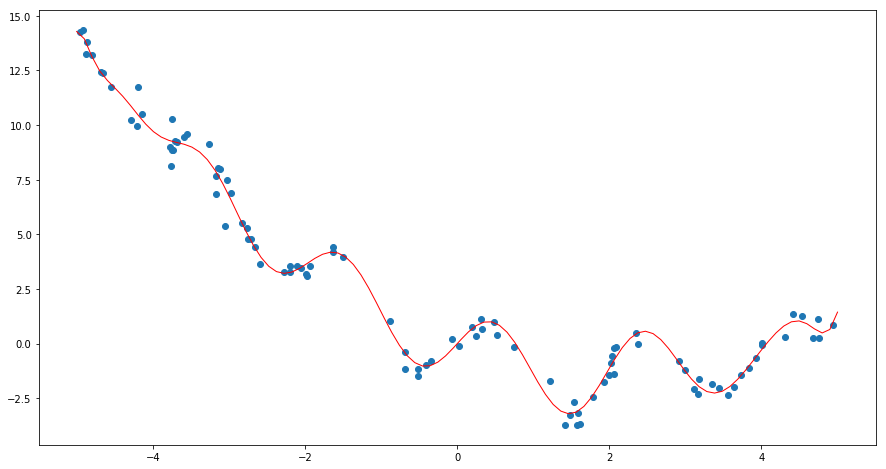

In [7]:
# plot for d = 21
plt.figure(figsize=(15,8))
x = x_train
y = y_train

x_line = np.array(np.linspace(-5,5, 100)).T
X_line = generate_X(x_line, d_min+1)
y_line = np.dot(X_line,w[d_min])

plt.scatter(x, y)
plt.plot(x_line, y_line, linewidth=1,color='red')



### e)
Plot the training and test errors against the degree of the polynomial. A paper-pencil plot on squared paper is fine. What do you observe?

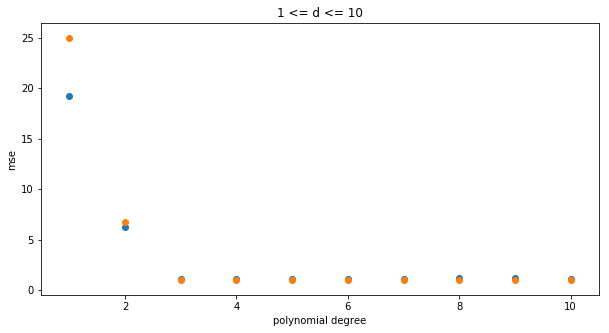

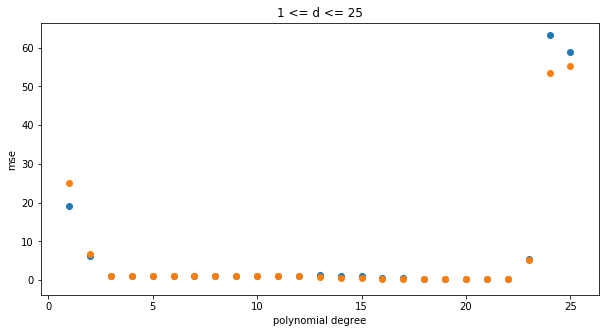

In [8]:
# training error and test error against degree of polynomial
plt.figure(figsize=(10,5))
plt.title('1 <= d <= 10')
plt.xlabel('polynomial degree')
plt.ylabel('mse')

d = np.array([np.linspace(1, 10, 10)]).T

plt.scatter(d, mse_test[:10])
plt.scatter(d, mse_train[:10])


plt.figure(figsize=(10,5))
plt.title('1 <= d <= 25')
plt.xlabel('polynomial degree')
plt.ylabel('mse')

d = np.array([np.linspace(1, 25, 25)]).T

plt.scatter(d, mse_test)
plt.scatter(d, mse_train)

### f)
Implement the estimator $w_{RIDGE}$.

In [9]:
# implement ridge regression

def w_ridge(X, y, lam):
    d = X.shape[1]

    matrix1 = lam * np.eye(d) + np.dot(X.T,X)
    matrix1_inverse = np.linalg.inv(matrix1)
    matrix2 = np.dot(matrix1_inverse,X.T)
    w = np.dot(matrix2,y)
    return(w)


### g)
Find a good combination of $d$ and $\lambda$ that gives you a small test error. Is it smaller than the test error of the optimal solution from (d)?

In [10]:
w_r = []
error_test_ridge = []
for d in range(25):
    for h in range(1000):
        w_r.append(w_ridge(X_train[d],y_train, -0.001*h))
        error_test_ridge.append(mse(w_r[h+1000*d],X_test[d], y_test))

mse_test_ridge = np.array(error_test_ridge) 

mse_min_ridge = np.amin(mse_test_ridge)


h_min = np.argmin(mse_test_ridge)
h_min = np.remainder(h_min, 1000)
lambda_min = h_min * -0.001 

polynomial_degree = (np.argmin(mse_test_ridge)-h_min)/1000

print('minimum MSE (ridge)' + str(mse_min_ridge)) # smallest MSE with ridge estimator
print('lambda:' + str(lambda_min)) 
print('polynomial degree:' + str(polynomial_degree))

minimum MSE (ridge)0.30985422432467064
lambda:-0.035
polynomial degree:20.0


In [11]:
print('MSE_MLE - MSE_RIDGE = ',mse_min - mse_min_ridge)

MSE_MLE - MSE_RIDGE =  0.02882330095977781


The ridge estimator with d = 20 and lambda = -0.035 gives a smaller test error than the maximum likelihood estimator.